<a href="https://colab.research.google.com/github/JPP-J/deep-_learning_project/blob/main/DL_7_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install tessaract

In [1]:
! sudo apt update
! sudo apt install tesseract-ocr -y


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,369 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,682 kB]
Get:13 http://archive.ubuntu.com/ubuntu ja

## Install other library

In [2]:
! pip install opencv-python pytesseract

## Link pic

In [3]:
from PIL import Image
import requests
from io import BytesIO

def image_show(link):

  link = link

  try:
      response = requests.get(link, stream=True)
      response.raise_for_status()  # Raise an error for bad status codes

      # Check if the response content is not empty
      if response.content:
          image = Image.open(BytesIO(response.content)).convert("RGB")
          # image.show()  # Show the image
          return image
      else:
          print("The response content is empty.")
  except requests.exceptions.RequestException as e:
      print(f"An error occurred while fetching the image: {e}")
  except Image.UnidentifiedImageError:
      print("The file could not be identified as an image.")
  except Exception as e:
      print(f"An unexpected error occurred: {e}")

In [4]:
link = "https://www.investopedia.com/thmb/w959_gtyU1UGzJDZYJSX1GgWzCI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/bookvalue-3e517fff0e004e5e9279c0061cae4aa0.png"

(1500, 1000)


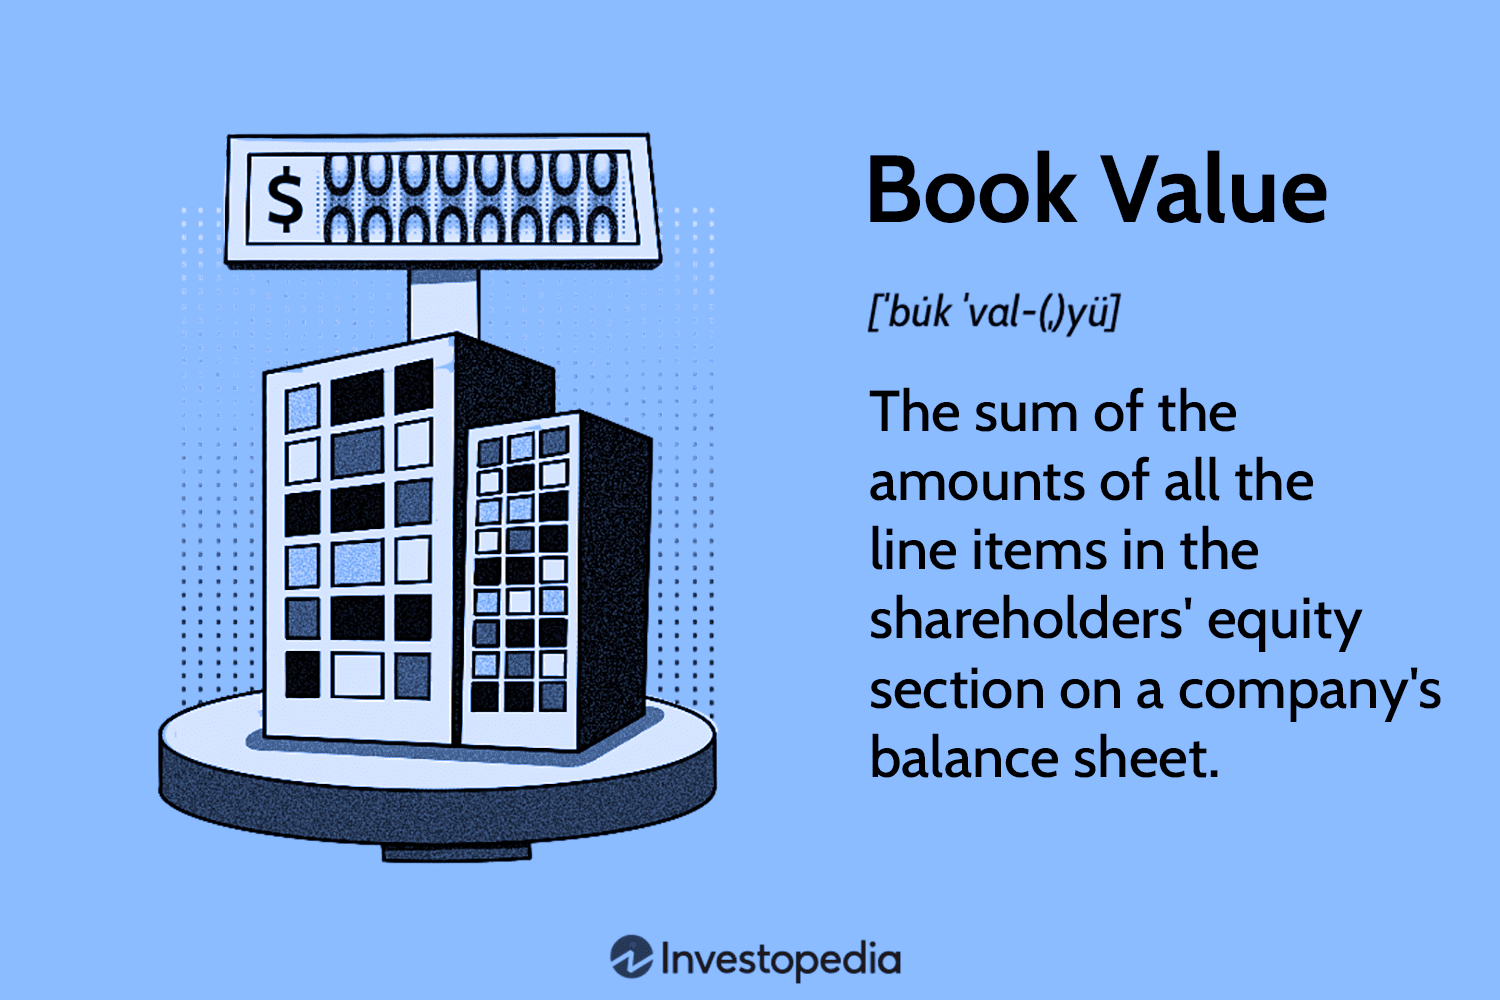

[[[139 188 255]
  [139 188 255]
  [139 188 255]
  ...
  [139 188 255]
  [139 188 255]
  [139 188 255]]

 [[139 188 255]
  [139 188 255]
  [139 188 255]
  ...
  [139 188 255]
  [139 188 255]
  [139 188 255]]

 [[139 188 255]
  [139 188 255]
  [139 188 255]
  ...
  [139 188 255]
  [139 188 255]
  [139 188 255]]

 ...

 [[139 188 255]
  [139 188 255]
  [139 188 255]
  ...
  [139 188 255]
  [139 188 255]
  [139 188 255]]

 [[139 188 255]
  [139 188 255]
  [139 188 255]
  ...
  [139 188 255]
  [139 188 255]
  [139 188 255]]

 [[139 188 255]
  [139 188 255]
  [139 188 255]
  ...
  [139 188 255]
  [139 188 255]
  [139 188 255]]]


In [5]:
import matplotlib.pyplot as plt
import numpy as np

image = image_show(link)

print(image.size)
# plt.imshow(image)
display(image)

print(np.array(image))



## OCR

In [6]:
import cv2
import numpy as np
import requests
import pytesseract
from io import BytesIO
from IPython.display import display, Image as IPImage  # For displaying images in the notebook
import matplotlib.pyplot as plt  # For displaying images using matplotlib

def OCR_extract_txt(link, show_im=False):
  # URL of the image
  image_url = link  # Replace with your image link

  # Step 1: Download the image from the URL
  response = requests.get(image_url)
  if response.status_code == 200:  # Check if the request was successful
      image_bytes = BytesIO(response.content)  # Convert response to bytes

      # Step 2: Convert image bytes to a NumPy array
      image_array = np.frombuffer(image_bytes.getvalue(), np.uint8) # unsigned 8-bit integer standard format for image data

      # Step 3: Decode image using OpenCV
      image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

      # Step 4: Convert to grayscale for OCR
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

      # Step 5: Extract text using Tesseract OCR
      text = pytesseract.image_to_string(gray)

      if show_im == True:
        # Step 6: Display the image in the notebook
        # Option 1: Using matplotlib
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
        plt.axis('off')  # Hide axes
        plt.title("Downloaded Image")
        plt.show()

      # # Option 2: Using IPython.display
      # # Convert the OpenCV image to bytes and display
      # _, encoded_image = cv2.imencode(".jpg", image)
      # display(IPImage(data=encoded_image.tobytes()))

  else:
      print("Error: Failed to download the image. Check the URL.")
  return text

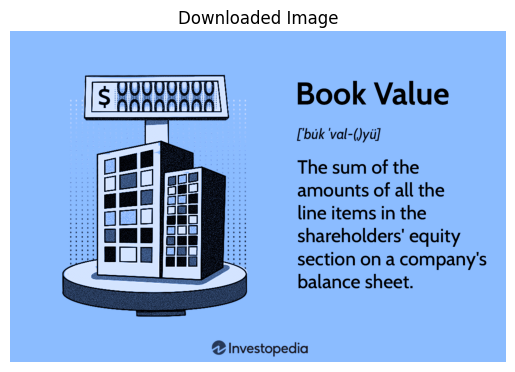

Extracted Text:
 Book Value
[buk ‘val-()yui]

The sum of the
amounts of all the

line items in the
shareholders’ equity
section on a company's
balance sheet.

 

@ Investopedia



In [7]:
text = OCR_extract_txt(link=link, show_im=True)

print("Extracted Text:\n", text)

In [8]:
! sudo apt-get install tesseract-ocr-tha

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-tha
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 899 kB of archives.
After this operation, 1,087 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-tha all 1:4.00~git30-7274cfa-1.1 [899 kB]
Fetched 899 kB in 0s (6,262 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-tha.
(Reading data

## OCR-TH

In [9]:
import cv2
import numpy as np
import requests
import pytesseract
from io import BytesIO
from IPython.display import display, Image as IPImage  # For displaying images in the notebook
import matplotlib.pyplot as plt  # For displaying images using matplotlib

def OCR_extract_txt_TH(link, language='tha', psm=6):
  # URL of the image
  image_url = link  # Replace with your image link

  # Step 1: Download the image from the URL
  response = requests.get(image_url)
  if response.status_code == 200:  # Check if the request was successful
      image_bytes = BytesIO(response.content)  # Convert response to bytes

      # Step 2: Convert image bytes to a NumPy array
      image_array = np.frombuffer(image_bytes.getvalue(), np.uint8) # unsigned 8-bit integer standard format for image data

      # Step 3: Decode image using OpenCV
      image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

      # Step 4: Convert to grayscale for OCR
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

      # Step 5: Extract text using Tesseract OCR
      # Extract text from an image with Thai language
      # Step 5: Extract text using Tesseract OCR with custom configuration
      custom_config = f'--psm {psm}'  # Page segmentation mode
      text = pytesseract.image_to_string(gray, lang=language, config=custom_config)

      print("Extracted Text:\n", text)

      # Step 6: Display the image in the notebook
      # Option 1: Using matplotlib
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
      plt.axis('off')  # Hide axes
      plt.title("Downloaded Image")
      plt.show()

      # # Option 2: Using IPython.display
      # # Convert the OpenCV image to bytes and display
      # _, encoded_image = cv2.imencode(".jpg", image)
      # display(IPImage(data=encoded_image.tobytes()))

  else:
      print("Error: Failed to download the image. Check the URL.")

config='--psm 6':

    --psm stands for "Page Segmentation Mode."

    6 assumes a single uniform block of text. This is useful for images with clear text layout.

    Other PSM modes include:

        0: Orientation and script detection (OSD) only.

        1: Automatic page segmentation with OSD.

        3: Fully automatic page segmentation (default).

        6: Assume a single uniform block of text.

        11: Sparse text. Find as much text as possible in no particular order.

In [10]:
Th_link = 'https://www.prosoftibiz.com/upload/6220/AYTS5hLHmh.png'

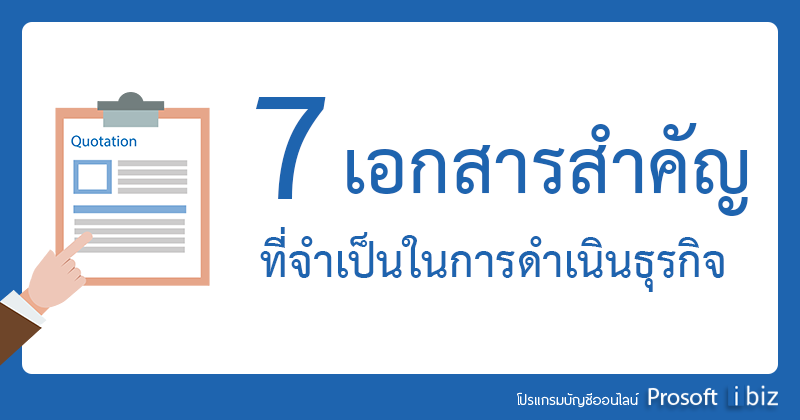

In [11]:
image_show(Th_link)

Extracted Text:
 ท เอเลน์อท

| 7 เอกสารสําคัญ

ที่จําเป็นในการดําเนินธุรกิจ

 



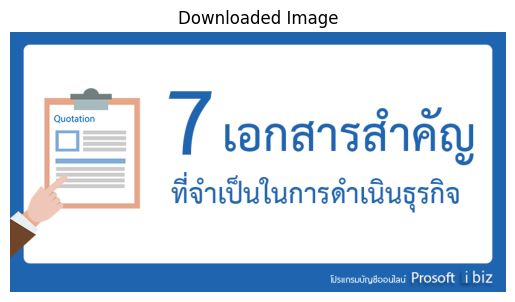

In [12]:
OCR_extract_txt_TH(Th_link, psm=3)

## FLASK-APP

In [19]:
! pip install flask
! pip install flask-ngrok
! pip install pyngrok flask
! ngrok authtoken ---------QoP----


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


https://www.investopedia.com/thmb/w959_gtyU1UGzJDZYJSX1GgWzCI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/bookvalue-3e517fff0e004e5e9279c0061cae4aa0.png

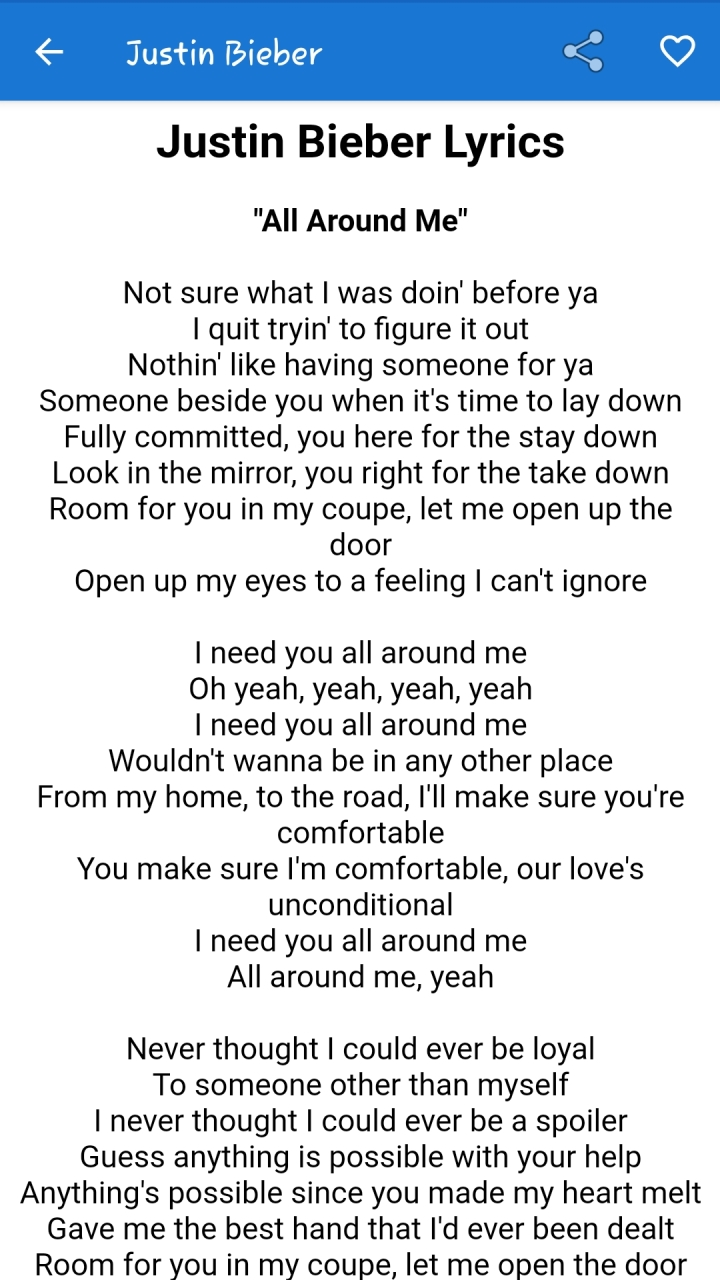

In [22]:
image_show(link="https://m.media-amazon.com/images/I/815zyx+Qi8L.jpg")

In [23]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
from pyngrok import ngrok
import random
import pandas as pd
import pickle

# Initialize Flask app
app = Flask(__name__)

# Open an ngrok tunnel
ngrok.set_auth_token("---------QoP----")  # Replace with your token
public_url = ngrok.connect(5000).public_url
print(f"Public URL: {public_url}")


@app.route('/ocr', methods=['GET'])
def get_ocr():
    link = request.args.get('link')
    if not link:
        return jsonify({"error": "Link is required"}), 400

    extract_text = OCR_extract_txt(link=link, show_im=False)
    text = {"extract_text": extract_text}

    return jsonify(text)

if __name__ == '__main__':
    app.run(port=5000)


Public URL: https://65f1-34-147-101-165.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [08/Mar/2025 04:47:16] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [08/Mar/2025 04:47:16] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [08/Mar/2025 04:47:31] "GET /ocr?link=https://m.media-amazon.com/images/I/815zyx+Qi8L.jpg HTTP/1.1" 200 -


Result from get will be:

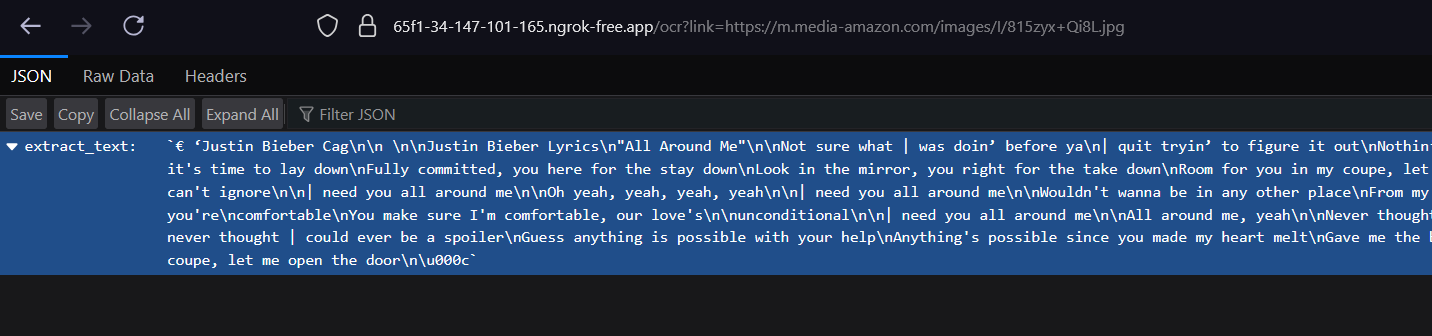


  extract_text	`€ ‘Justin Bieber Cag\n\n \n\nJustin Bieber Lyrics\n"All Around Me"\n\nNot sure what | was doin’ before ya\n| quit tryin’ to figure it out\nNothin’ like having someone for ya\nSomeone beside you when it's time to lay down\nFully committed, you here for the stay down\nLook in the mirror, you right for the take down\nRoom for you in my coupe, let me open up the\ndoor\nOpen up my eyes to a feeling | can't ignore\n\n| need you all around me\n\nOh yeah, yeah, yeah, yeah\n\n| need you all around me\n\nWouldn't wanna be in any other place\nFrom my home, to the road, I'll make sure you're\ncomfortable\nYou make sure I'm comfortable, our love's\n\nunconditional\n\n| need you all around me\n\nAll around me, yeah\n\nNever thought | could ever be loyal\nTo someone other than myself\n| never thought | could ever be a spoiler\nGuess anything is possible with your help\nAnything's possible si